In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from crycompare import *
%matplotlib inline

In [72]:
import matplotlib

In [2]:
h = History()

In [56]:
class Get_prices(History):
    def __init__(self,num1,num2):
        self.num1, self.num2 = num1,num2
        self.h = History()
        self.bit_l1,self.bit_l2, self.bit_dl = self.get_price_bitcoin()
        self.h = History()   
    def get_price_all(self,coins):
        df_dict = {}
        h = History()
        for coin in coins:
            histo = h.histoDay(coin,'BTC',allData=True)
            if histo['Data']:
                df_histo = pd.DataFrame(histo['Data'])
                df_histo['time'] = pd.to_datetime(df_histo['time'],unit='s')
                df_histo.index = df_histo['time']
                del df_histo['time']
                del df_histo['volumefrom']
                del df_histo['volumeto']

                df_dict[coin] = df_histo

        crypto_histo = pd.concat(df_dict.values(), axis=1, keys=df_dict.keys())
        histo_coins = [elem for elem in crypto_histo.columns.levels[0] if not elem == 'MYC']
        histo_length = {}
        for coin in histo_coins:
            histo_length[coin] = np.sum( ~np.isnan(crypto_histo[coin]['close'].values) )

        sorted_length = sorted(histo_length.items(), key=operator.itemgetter(1),reverse=True)

        # we keep the 300 coins having the longest time series of historical prices
        sub_coins = [sorted_length[i][0] for i in range(len(coins))]

        sub_crypto_histo = crypto_histo[sub_coins]

        sub_crypto_histo.fillna(0, inplace=True)
        l = []
        dl = []
        for c in coins:
            l1 = sub_crypto_histo.loc[:,c]['close'].as_matrix()
            l2 = sub_crypto_histo.loc[:,c]['open'].as_matrix()
            print(len(l1))
            l.append(l1[self.num1:self.num2]*self.bit_l1[-len(l1):][self.num1:self.num2])


            dl.append(l1[self.num1:self.num2]*self.bit_l1[-len(l1):][self.num1:self.num2] \
                      - l2[self.num1:self.num2]*self.bit_l2[-len(l1):][self.num1:self.num2])
        return l, dl
    def get_price_bitcoin(self):
        df_dict = {}
        h = History()
        histo = h.histoDay('BTC','USD',allData=True)
        if histo['Data']:
            df_histo = pd.DataFrame(histo['Data'])
            df_histo['time'] = pd.to_datetime(df_histo['time'],unit='s')
            df_histo.index = df_histo['time']
            del df_histo['time']
            del df_histo['volumefrom']
            del df_histo['volumeto']

            df_dict['BTC'] = df_histo

        crypto_histo = pd.concat(df_dict.values(), axis=1, keys=df_dict.keys())
        histo_coins = [elem for elem in crypto_histo.columns.levels[0] if not elem == 'MYC']
        histo_length = {}
        for coin in histo_coins:
            histo_length[coin] = np.sum( ~np.isnan(crypto_histo[coin]['close'].values) )

        sorted_length = sorted(histo_length.items(), key=operator.itemgetter(1),reverse=True)

        # we keep the 300 coins having the longest time series of historical prices
        sub_coins = [sorted_length[i][0] for i in range(len(['BTC']))]

        sub_crypto_histo = crypto_histo[sub_coins]

        sub_crypto_histo.fillna(0, inplace=True)

        
        l1 = sub_crypto_histo.loc[:,'BTC']['close'].as_matrix()
        l2 = sub_crypto_histo.loc[:,'BTC']['open'].as_matrix()
        dl = l1 - l2
        return l1,l2, dl
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [57]:
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook

In [58]:
### Moving averages, large, small
per1, per2 = 30,15

<IPython.core.display.Javascript object>


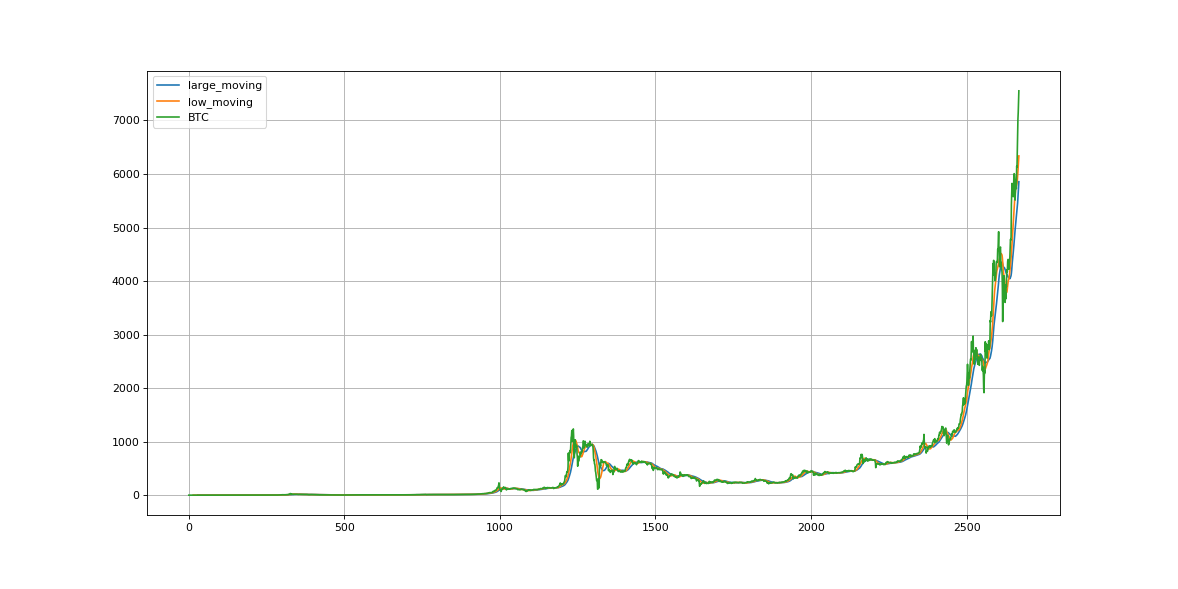

In [68]:
#Bitcoin only. Keep in mind bitcoin is used as a base for all since the API is wonky with it
g = Get_prices(0,-1)
l,l2, dl =[g.bit_l1],[g.bit_l2], [g.bit_dl]
fig = plt.figure(figsize = (15,7.5))

for ll,cc in zip(l,['BTC']):
    x = np.arange(0,len(ll))
    yMA1 = movingaverage(ll,per1)
    yMA2 = movingaverage(ll,per2)
    plt.plot(x[len(x)-len(yMA1):],yMA1, label = 'large_moving')
    plt.plot(x[len(x)-len(yMA2):],yMA2, label = 'low_moving')
    plt.plot(ll,label = cc)
plt.legend()
plt.grid()

822
822


<IPython.core.display.Javascript object>


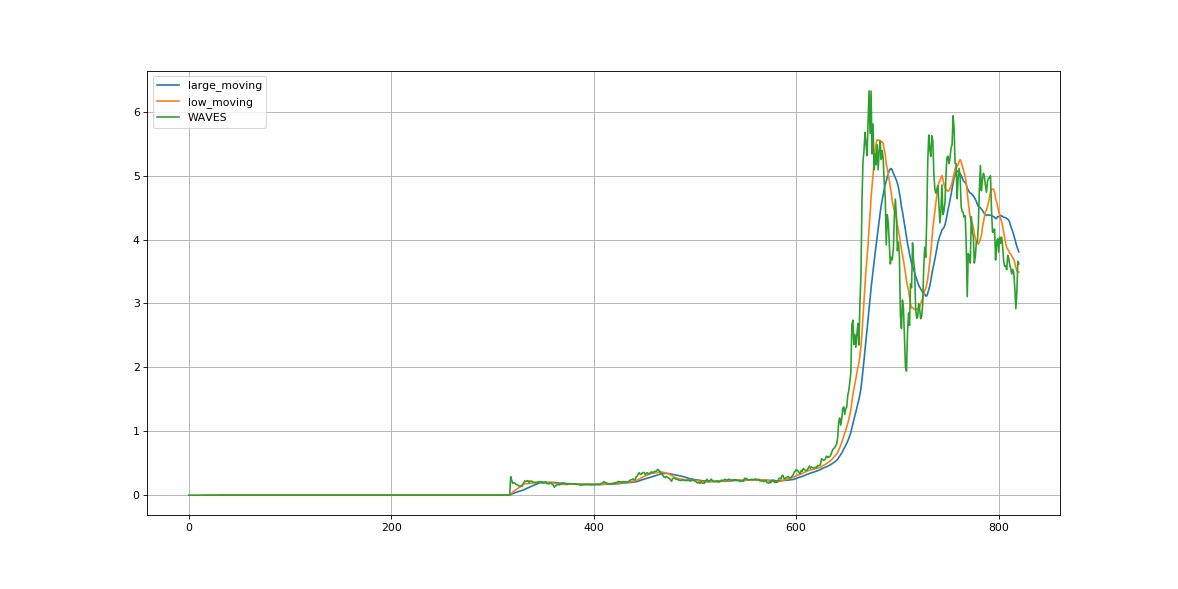

<IPython.core.display.Javascript object>


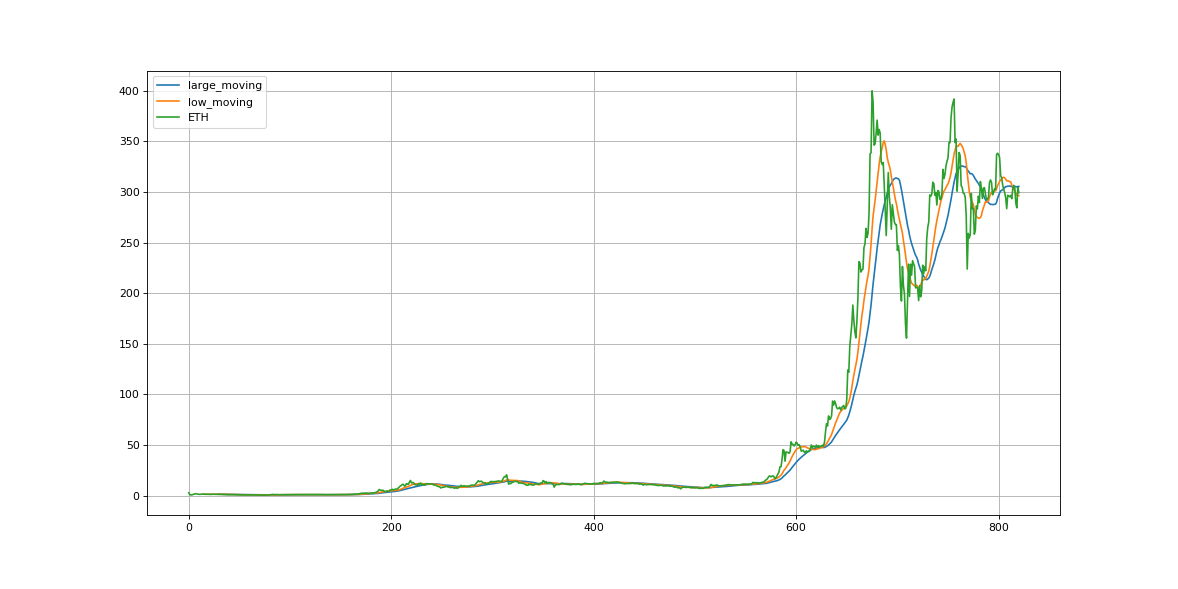

In [65]:
coins = ['WAVES','ETH']
g = Get_prices(0,-1)
l,dl = g.get_price_all(coins)
per1, per2 = 30,15
for ll,cc in zip(l,coins):
    
    x = np.arange(0,len(ll))
    yMA1 = movingaverage(ll,per1)
    yMA2 = movingaverage(ll,per2)
    fig = plt.figure(figsize = (15,7.5))
    plt.plot(x[len(x)-len(yMA1):],yMA1, label = 'large_moving')
    plt.plot(x[len(x)-len(yMA2):],yMA2, label = 'low_moving')
    plt.plot(ll,label = cc)
    plt.legend()
    plt.grid()
    plt.show()

822
822


<IPython.core.display.Javascript object>


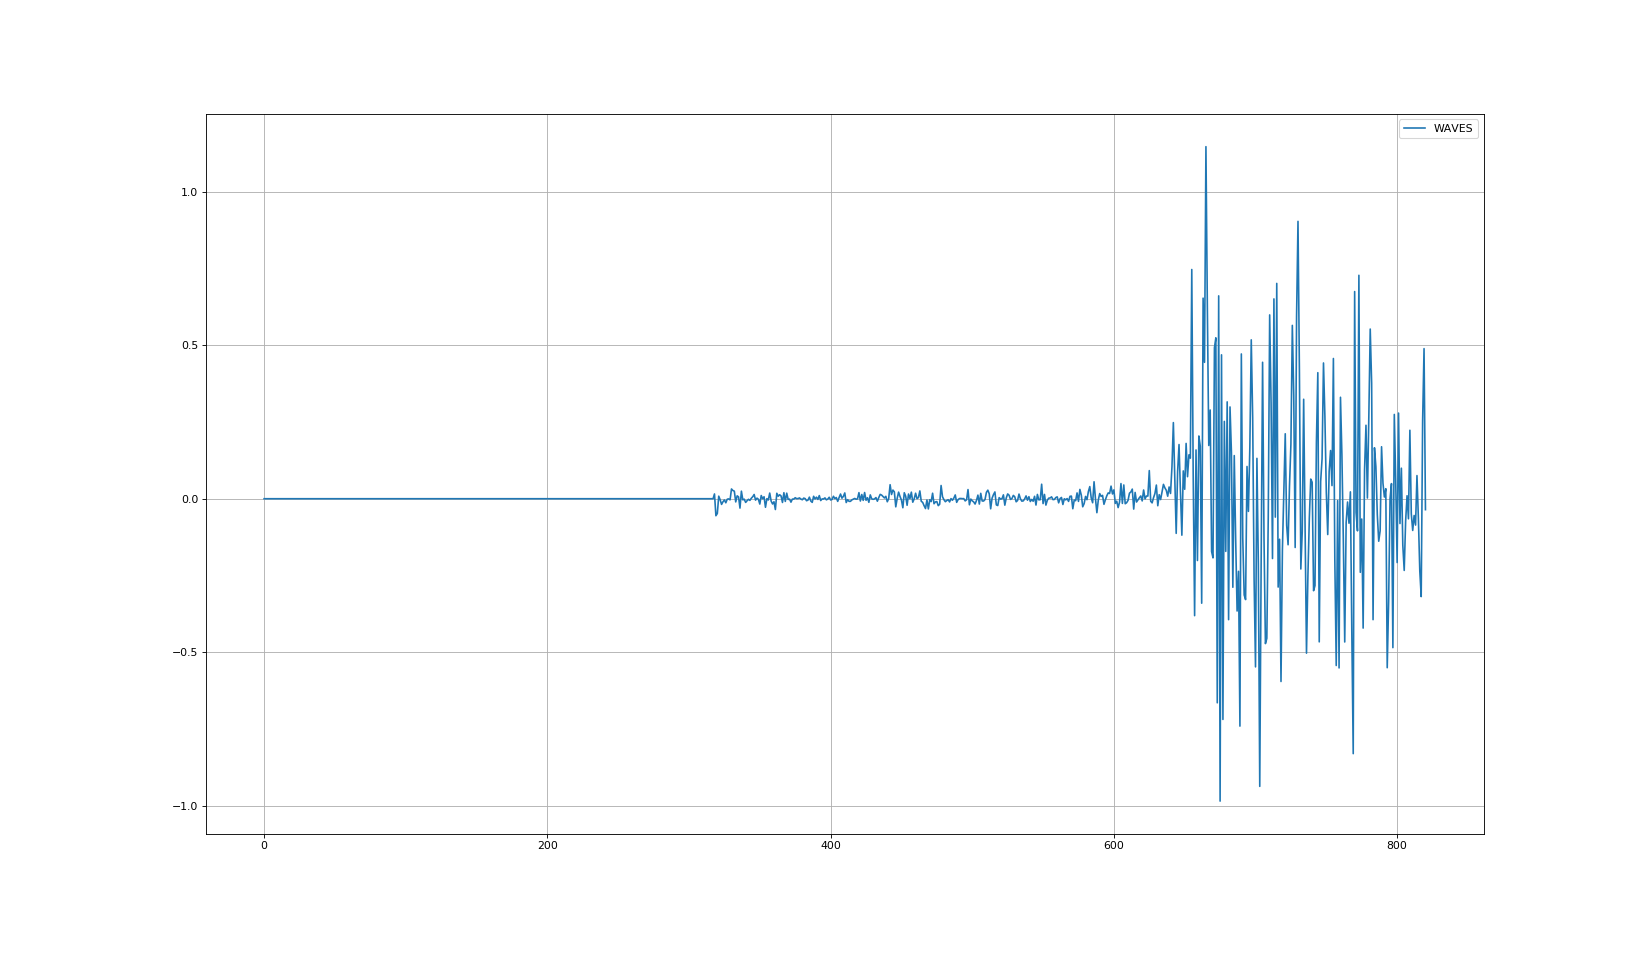

<IPython.core.display.Javascript object>


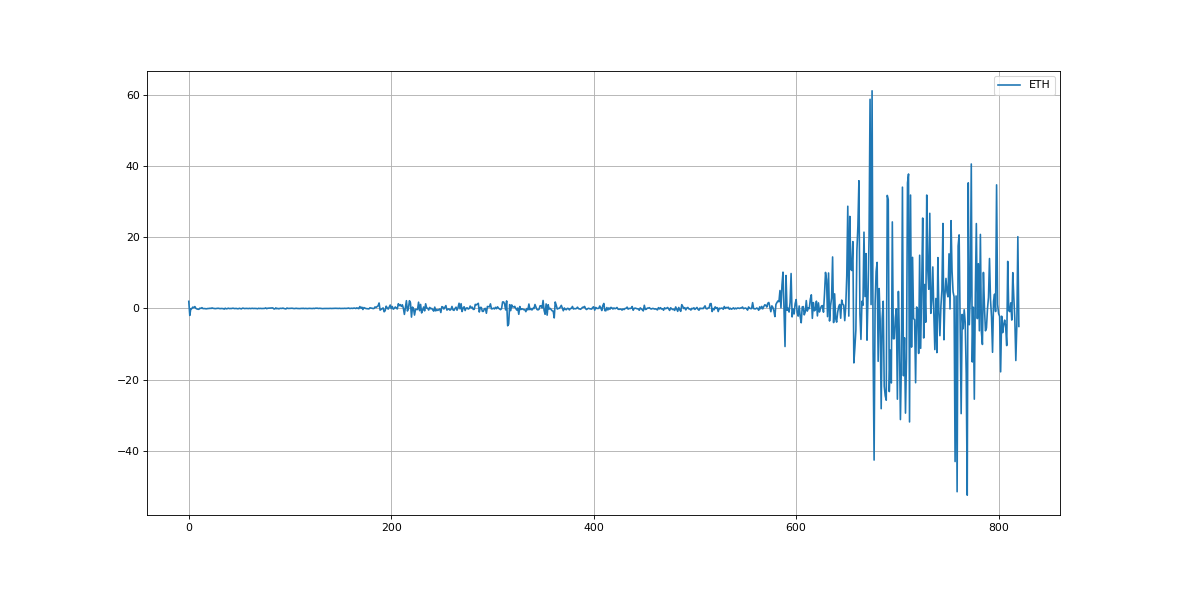

In [67]:
coins = ['WAVES','ETH']
g = Get_prices(0,-1)
l,dl = g.get_price_all(coins)
per1, per2 = 30,15
for ll,cc in zip(dl,coins):
    
    x = np.arange(0,len(ll))
    yMA1 = movingaverage(ll,per1)
    yMA2 = movingaverage(ll,per2)
    fig = plt.figure(figsize = (15,7.5))
    #plt.plot(x[len(x)-len(yMA1):],yMA1, label = 'large_moving')
    #plt.plot(x[len(x)-len(yMA2):],yMA2, label = 'low_moving')
    plt.plot(ll,label = cc)
    plt.legend()
    plt.grid()
    plt.show()